<a href="https://colab.research.google.com/github/kyletran77/Coursera_Capstone/blob/master/DATA_AUG_SAMPLE_COVID_detection_with_146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries



In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K  
import os 
import cv2
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [ ]:
#!pip uninstall tensorflow-2.2

In [ ]:
#!pip install tensorflow==1.14

Kaggle Dataset with only 146 entries

In [ ]:
CSVMETA = '/content/drive/My Drive/covid-chest-xray/metadata.csv'
pd.set_option("display.max_rows", None)

In [ ]:
meta = pd.read_csv(CSVMETA)
meta = meta[['finding', 'filename']]
meta.head(
          )

,finding,filename
0,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,nejmc2001573_f1a.jpeg


In [ ]:
 labels = ['No Finding','COVID-19', 'Pneumonia']


In [ ]:
meta.loc[(meta.finding == 'ARDS'),'finding']='Pneumonia'
meta.loc[(meta.finding == 'Pneumocystis'),'finding']='Pneumonia'
meta.loc[(meta.finding == 'Streptococcus'),'finding']='Pneumonia'
meta.loc[(meta.finding == 'SARS'),'finding']='Pneumonia'


meta.head(
          )
    

,finding,filename
0,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,nejmc2001573_f1a.jpeg


1.rename the new dataset to filename

2.put the images in the same folder this way it can draw easily

3.join the datasets together


Visulize the example of how the filename from the dataset is being connected to the image names.  This allows the connection to be plotted on matplotlib after creating the array.

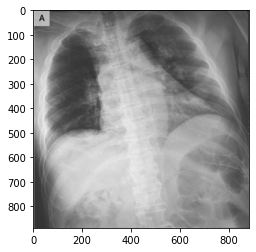

In [ ]:
DATAXRAY = '/content/drive/My Drive/covid-chest-xray'
imagedf = meta['filename']
categories = ['images']
for imagefile in categories:
  path = os.path.join(DATAXRAY, imagefile)
  for img in imagedf:
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

  
#strepthroat bacteria
#ecoli bacteria
#bacteria



In [ ]:
print(img_array)

[[255 254 253 ...  70  69  69]
 [255 255 254 ...  67  67  67]
 [255 255 254 ...  66  65  65]
 ...
 [255 255 250 ... 107 109 110]
 [255 255 250 ...  97  98  98]
 [255 255 250 ...  74  75  76]]


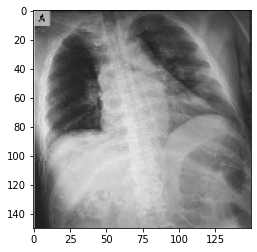

In [ ]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

This is a super simple augmentation from augmenters to see how much data we can simulate just from doing simple transformations.

In [ ]:
import imgaug as ia
import imgaug.augmenters as iaa
seq = iaa.Sequential([
    iaa.Crop(px=(1, 16), keep_size=False),
    iaa.Fliplr(0.5),
    iaa.GaussianBlur(sigma=(0, 3.0))
])


In [ ]:
training_data =[]
def augmented_data():
  for imagefile in categories:
    path = os.path.join(DATAXRAY, imagefile)
    for img in imagedf:
        Class_num = labels.index(meta['finding'][meta.loc[meta['filename'] == (img)].index[0]])
        img_array = cv2.imread(os.path.join(path, img))
        new_array = np.array(cv2.resize(img_array,(IMG_SIZE, IMG_SIZE)))
        #images_aug = seq(images=new_array)
        #for aug in images_aug:
        training_data.append([new_array, Class_num])
      

augmented_data()

In [ ]:
print(len(training_data))

146


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
1
1
1
1
1
1
1
1
1


In [ ]:
Data =[]
label=[]

In [ ]:
for features, labels in training_data:
  Data.append(features)
  label.append(labels)


In [ ]:
!pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=53c98735d0c86ae67e43e6ec824d29e5af63d04f6369cb8db8daf1dff2023915
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


In [ ]:
from keras_resnet.models import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
print(label
      )

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
INIT_LR = 1e-1
BS = 10
EPOCHS = 50

In [ ]:
Data= np.array(Data,dtype = 'float') /255.0

le = LabelEncoder()
label = le.fit_transform(label)
label = np_utils.to_categorical(label, 3)

(trainX, testX, trainy, testy) = train_test_split(Data, label, test_size = 0.1, random_state = 42)

In [ ]:
aug = ImageDataGenerator()

In [ ]:

aug = ImageDataGenerator(rotation_range = 20,
                         width_shift_range =20,
                         height_shift_range = 0.2,
                               shear_range =0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True, fill_mode ='nearest')

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.initializers import glorot_uniform

In [ ]:

model = Sequential()

model.add(Conv2D(16, (3,3), activation = 'relu', data_format = 'channels_last',input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D((34), (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'softmax', units = 3))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])



In [ ]:

class_weight = { 1 : 0.05,
                0 : 0.8, 2: 0.15}



In [ ]:

H = model.fit_generator(
	aug.flow(trainX, trainy, batch_size=BS),
	validation_data=(testX, testy),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, class_weight = class_weight, shuffle = True)

Epoch 1/50
13/13 [==============================] - 7s 520ms/step - loss: 0.1156 - accuracy: 0.7355 - val_loss: 0.5813 - val_accuracy: 0.6667
Epoch 2/50
13/13 [==============================] - 1s 55ms/step - loss: 0.1021 - accuracy: 0.8264 - val_loss: 0.7680 - val_accuracy: 0.6667
Epoch 3/50
13/13 [==============================] - 1s 53ms/step - loss: 0.0644 - accuracy: 0.8595 - val_loss: 0.6001 - val_accuracy: 0.6667
Epoch 4/50
13/13 [==============================] - 1s 59ms/step - loss: 0.0775 - accuracy: 0.8462 - val_loss: 0.8283 - val_accuracy: 0.6667
Epoch 5/50
13/13 [==============================] - 1s 57ms/step - loss: 0.1778 - accuracy: 0.8182 - val_loss: 0.9436 - val_accuracy: 0.6667
Epoch 6/50
13/13 [==============================] - 1s 53ms/step - loss: 0.0700 - accuracy: 0.8661 - val_loss: 0.7159 - val_accuracy: 0.6667
Epoch 7/50
13/13 [==============================] - 1s 54ms/step - loss: 0.0988 - accuracy: 0.8308 - val_loss: 0.8159 - val_accuracy: 0.6667
Epoch 8/50
1

In [ ]:
#evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testy.argmax(axis=1),
	predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.92      0.80      0.83        15
weighted avg       0.89      0.87      0.86        15



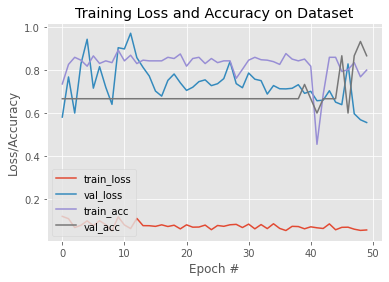

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
